# K-means on wine dataset & yellowbrick & cluster characterization

In [ ]:
# sklearn imports
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# pandas and numpy imports
import pandas as pd
import numpy as np

# plotting imports
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# yellowbrick libs
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

# from ch_7_consts import WINE_FEATURES

# set sns theme and set pandas to display all rows and columns
sns.set_theme()

In [ ]:
SOY_FEATURE_DESCRIPTION = {
       'date': 'Represents the specific time of soybean sample collection, crucial for understanding seasonal impacts on plant health.',
       'plant-stand': 'Qualitatively assesses the uniformity and health of the plant population, informing about possible early-stage diseases or growth issues.',
       'precip': 'Captures the water level conditions around the sampling time, providing insights into potential water-related stress factors.',
       'temp': 'Reflects the average climatic temperature at the time of observation, crucial for assessing environmental stress conditions.',
       'hail': 'A binary indicator that identifies whether the plant has undergone hail damage, which could affect overall plant health.',
       'crop-hist': 'Denotes the type of crop previously grown in the same field, essential for understanding soil quality and disease carryover risks.',
       'area-damaged': 'Quantifies the spatial extent of observable damage, useful for gauging the disease\'s progression.',
       'severity': 'Categorizes the observable symptoms into different severity levels, aiding in diagnostic precision.',
       'seed-tmt': 'Indicates whether the seeds underwent any treatment before planting, offering clues to possible resistance against diseases.',
       'germination': 'Measures the proportion of seeds that successfully sprouted, a potential early indicator of crop health.',
       'leaves': 'Evaluates leaf condition, which is often the first site of symptom expression in many plant diseases.',
       'lodging': 'A binary flag that notes whether the plant is upright or has fallen, often indicative of structural weakness or disease.',
       'stem-cankers': 'Details the characteristics of stem cankers if present, essential for identifying specific stem diseases.',
       'canker-lesion': 'Documents the type and appearance of canker lesions on the stem, crucial for diagnostic accuracy.',
       'fruiting-bodies': 'A binary indicator of the presence of fruiting bodies, suggesting advanced stages of certain fungal diseases.',
       'external decay': 'Flags the presence of decay on the plant\'s exterior, indicative of severe fungal or bacterial infection.',
       'mycelium': 'A binary indicator for the presence of fungal mycelium, a sign of fungal diseases.',
       'int-discolor': 'Flags internal discoloration, often indicative of systemic infections.',
       'sclerotia': 'Indicates the presence of sclerotial bodies, commonly associated with advanced fungal diseases.',
       'fruit-pods': 'Evaluates the overall health of the fruit pods, crucial for assessing the final yield quality.',
       'roots': 'Assesses root health, providing insights into soil-borne diseases and nutritional deficiencies.'
}

WINE_FEATURES = {
       'alcohol': 'Measures the alcohol content in wine.\n' +
              '- Low (<11%): Lighter, potentially less body.\n' +
              '- Medium (11-14%): Balanced, more body and complexity.\n' +
              '- High (>14%): Fuller-bodied, may feel "hot" if not balanced.',

       'malic_acid': 'Indicates the acidity level from malic acid.\n' +
              '- Low (<0.2 g/L): Less tartness, potentially sweeter.\n' +
              '- High (>0.5 g/L): Tart, "green apple" like acidity.',

       'ash': 'Represents the non-volatile residue in wine.\n' +
              '- Typical range is 1.5-3.0 g/L; doesn\'t directly influence taste.',

       'alcalinity_of_ash': 'Measures the alcalinity of the ash content.\n' +
              '- Low (<15): Higher acidity, crisp.\n' +
              '- High (>25): Lower acidity, might taste flat.',

       'magnesium': 'Indicates the magnesium level in wine.\n' +
              '- Standard range 70-120 ppm; doesn\'t directly affect taste.',

       'total_phenols': 'Represents the total phenolic content.\n' +
              '- Low (<500 mg/L): Less complex, might age poorly.\n' +
              '- High (>1500 mg/L): More complexity, better aging potential.',

       'flavanoids': 'Indicates the flavanoid phenolic content.\n' +
              '- Low (<100 mg/L): Less complexity, poorer aging.\n' +
              '- High (>500 mg/L): More complexity, better aging potential.',

       'nonflavanoid_phenols': 'Measures the non-flavanoid phenolic content.\n' +
              '- Low (<20 mg/L): Better aging potential.\n' +
              '- High (>50 mg/L): Could affect mouthfeel negatively.',

       'proanthocyanins': 'Indicates the proanthocyanin content.\n' +
              '- Low (<200 mg/L): Lighter color.\n' +
              '- High (>500 mg/L): Darker color, more aging potential.',

       'color_intensity': 'Measures the color intensity of the wine.\n' +
              '- Low: Lighter color, often lighter flavor.\n' +
              '- High: Darker color, often bolder flavor.',

       'hue': 'Indicates the hue, or color tint, of the wine.\n' +
              '- Lower : Younger or less quality in red wines.\n' +
              '- High : Older, potentially higher quality especially in red wines.',

       'od280/od315_of_diluted_wines': 'Measures the antioxidant content using absorbance ratio.\n' +
              '- Low (<1.5): Lower antioxidant content.\n' +
              '- High (>3.0): Higher antioxidant content, might indicate better aging potential.',

       'proline': 'Indicates the proline level, an amino acid.\n' +
              '- Low (<500 mg/L): Could indicate less ripe grapes or lower quality.\n' +
              '- High (>1000 mg/L): Could indicate riper grapes or higher quality.'
}

### Load wine dataset

The Wine dataset is a classic multivariate dataset used for classification tasks in machine learning.
- It consists of 178 samples of wine from three different cultivars (classes) in the same region in Italy.
- Each sample has 11 continuous attributes (features) that are the result of a chemical analysis of the wines.
- The goal of using this dataset is usually to build a classifier that can predict the cultivar of a wine based on its chemical composition.

The dataset contains following features:

- **Alcohol**: The alcohol content in the wine, measured in percentage.
- **Malic Acid**: The amount of malic acid in the wine.
- **Ash**: The measure of the non-aqueous residue remaining after heating.
- **Alcalinity of Ash**: A measure of the alkalinity of the ash formed post-combustion.
- **Magnesium**: The amount of magnesium in the wine.
- **Total Phenols**: The total amount of phenolic compounds.
- **Flavanoids**: Indicates the flavanoid phenolic content.
- **Nonflavanoid Phenols**: Measures the non-flavanoid phenolic content.
- **Proanthocyanins**: Indicates the proanthocyanin content.
- **Color Intensity**: The intensity of the wine's color, measured optically.
- **Hue**: The color attribute that describes a pure color, usually measured via spectrophotometry.
- **OD280/OD315 of diluted wines**: Measures the antioxidant content using absorbance ratio.
- **Proline**: The amount of the amino acid proline.

Citation : Aeberhard,Stefan and Forina,M.. (1991). Wine. UCI Machine Learning Repository. https://doi.org/10.24432/C5PC7J.

/tmp/ipython-input-2327968455.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = g.set_xticklabels(g.get_xticklabels(), rotation=90)


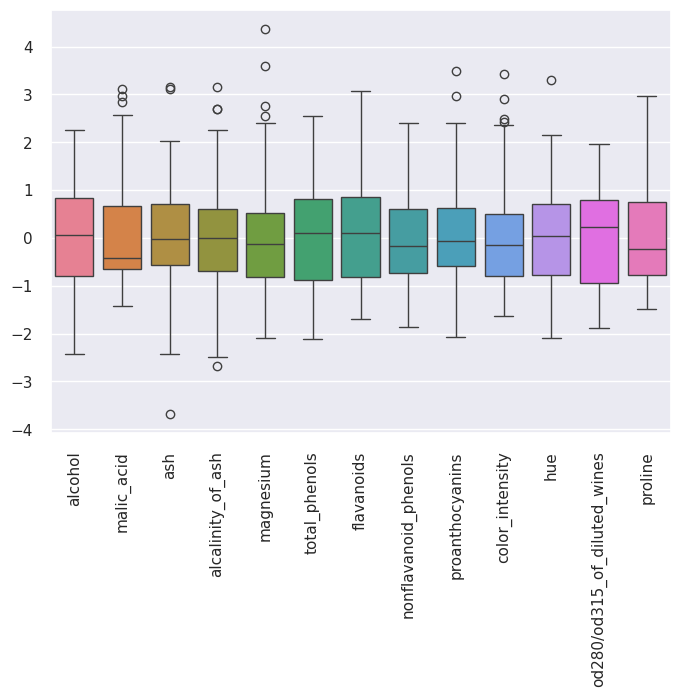

In [ ]:
# Load the wine dataset
wine_data = load_wine()

wine_df_numeric = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

wine_df = wine_df_numeric.copy()
wine_df['label'] = wine_data.target


# Scale the data
standard_scaler = StandardScaler()
standard_scaler.fit(wine_df_numeric)
wine_df_numeric_scaled = standard_scaler.transform(wine_df_numeric)

# Create data df
wine_df_numeric = pd.DataFrame(
    wine_df_numeric_scaled,
    columns = wine_df_numeric.columns
)

g = sns.boxplot(wine_df_numeric)
_ = g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [ ]:
wine_df_numeric_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

### Run k-means with yellowbrick

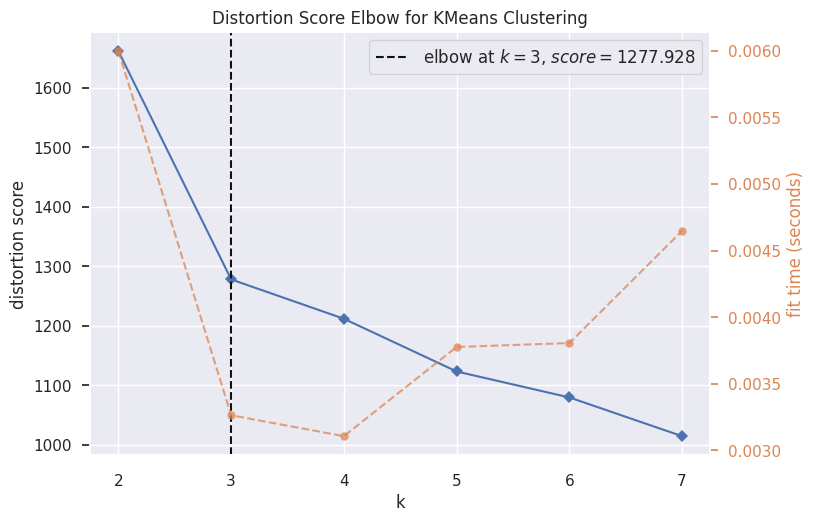

In [ ]:
model = KMeans(n_init='auto', random_state=42)
visualizer = KElbowVisualizer(model, k=(2,3,4,5,6,7))

visualizer=visualizer.fit(wine_df_numeric)
visualizer.show();

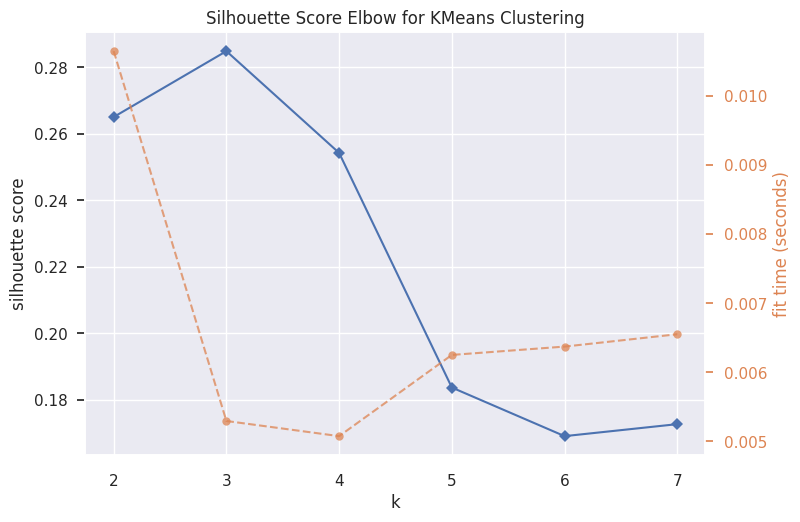

In [ ]:
model = KMeans(n_init='auto', random_state=42)

visualizer = KElbowVisualizer(model, k=(2,3,4,5,6,7), metric='silhouette', locate_elbow=False)

visualizer=visualizer.fit(wine_df_numeric)   # Fit the data to the visualizer
visualizer.show();

Number of PCA components 13


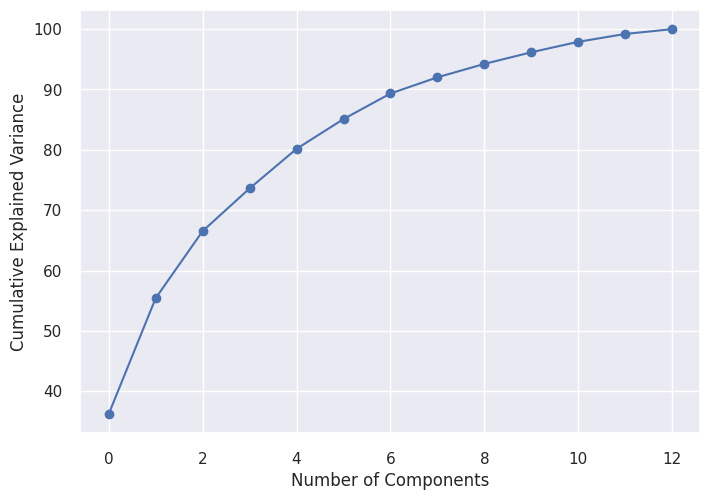

In [ ]:
# Perform PCA
pca = PCA()
pca.fit(wine_df_numeric)
pca_transformed_data = pca.transform(wine_df_numeric)

print('Number of PCA components {}'.format(pca_transformed_data.shape[1]))

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)*100

plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)
plt.scatter(range(len(cumulative_explained_variance)),cumulative_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [ ]:
print(wine_df_numeric.shape)
print(pca_transformed_data.shape)

(178, 13)
(178, 13)


In [ ]:
candidate_k = [2,3,4,5]

In [ ]:
tab10 = list(matplotlib.colormaps['tab10'].colors)

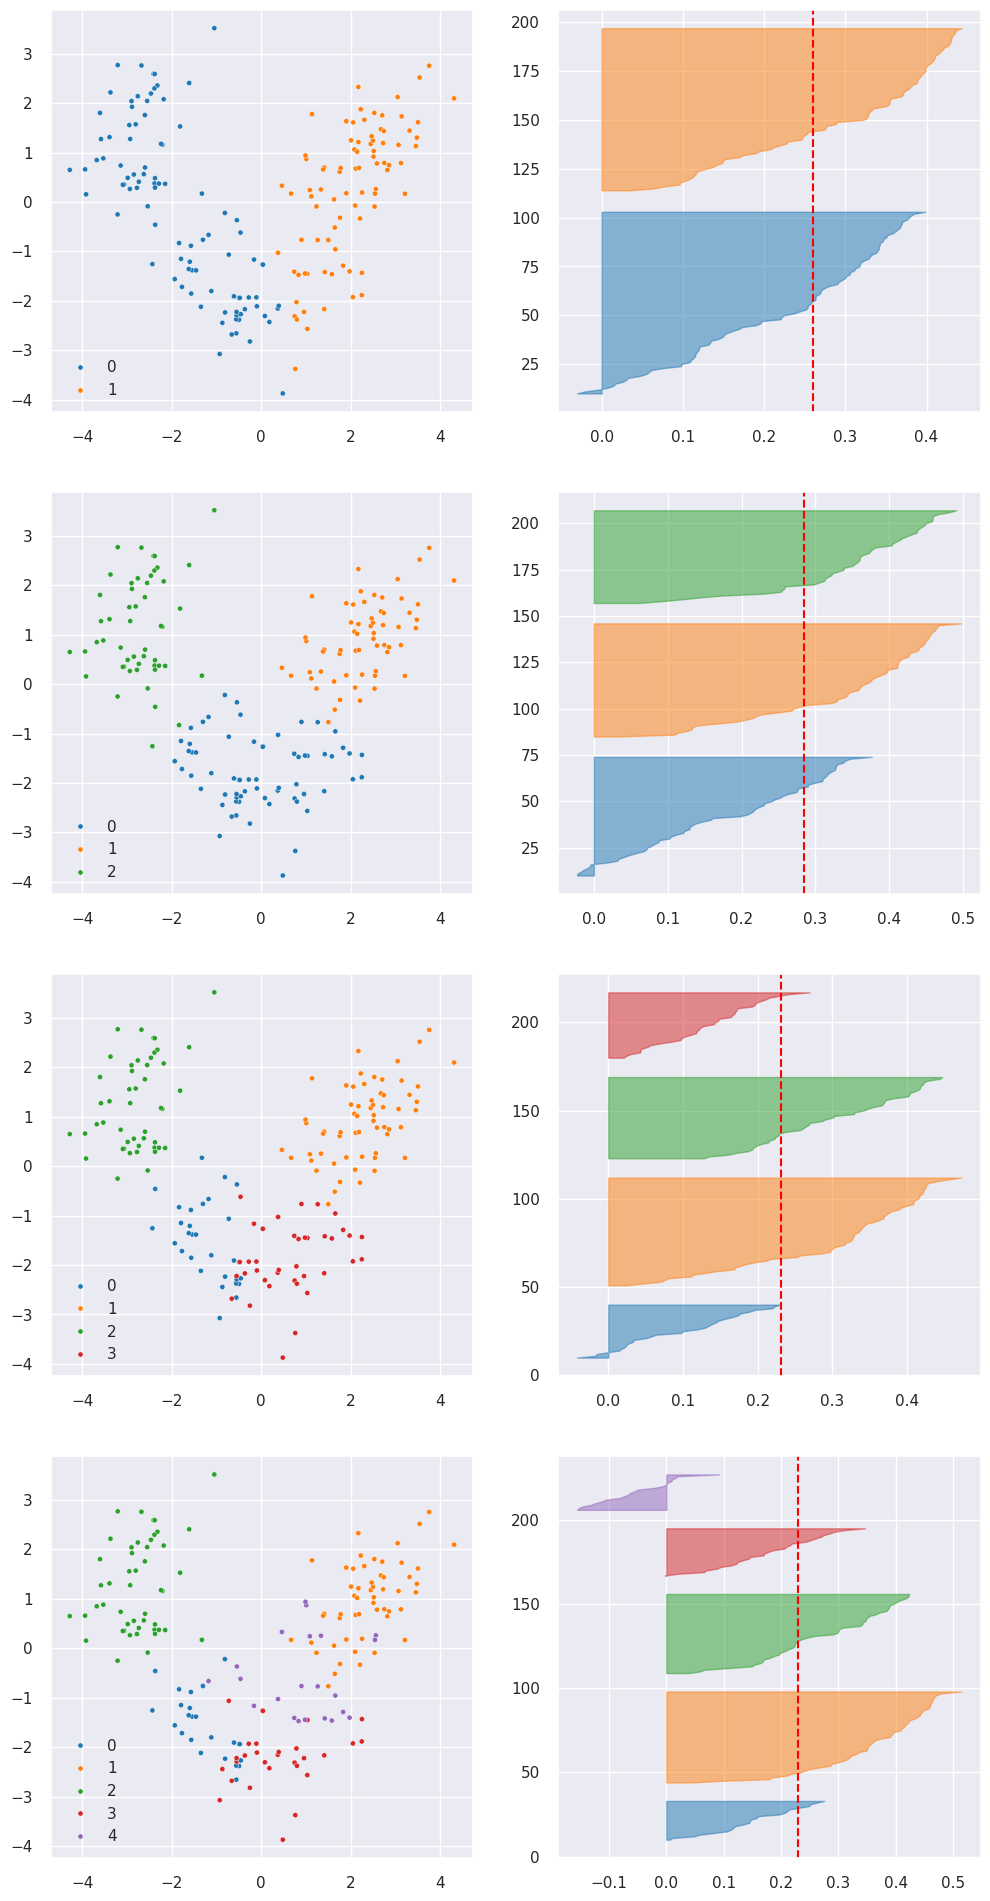

In [ ]:
# Perform clustering for multiple resolutons
fig, axs = plt.subplots(
    len(candidate_k), 2,
    figsize=(12, 24)
)

cluster_label_dict = {}

for i, num_clust in enumerate(candidate_k):


    # Perform clustering for current number of clusters
    kmeans = KMeans(n_clusters=num_clust, n_init='auto', random_state=2)
    kmeans.fit(wine_df_numeric.to_numpy())

    sns.scatterplot(
        x=pca_transformed_data[:,0],
        y=pca_transformed_data[:,1],
        hue=kmeans.labels_,
        ax=axs[i, 0],
        s=14, palette='tab10'
    )

    visualizer = SilhouetteVisualizer(
        kmeans,
        is_fitted=True,
        colors=tab10,
        ax=axs[i, 1]
    )

    visualizer = visualizer.fit(wine_df_numeric.to_numpy())

    cluster_label_dict[num_clust] = kmeans.labels_

### Cluster characterization

In [ ]:
from IPython.display import display, Markdown

alcohol - Measures the alcohol content in wine.
- Low (<11%): Lighter, potentially less body.
- Medium (11-14%): Balanced, more body and complexity.
- High (>14%): Fuller-bodied, may feel "hot" if not balanced.

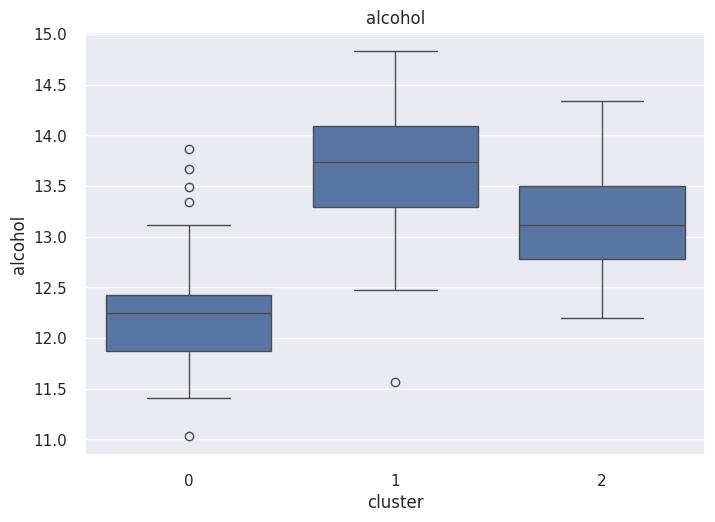

malic_acid - Indicates the acidity level from malic acid.
- Low (<0.2 g/L): Less tartness, potentially sweeter.
- High (>0.5 g/L): Tart, "green apple" like acidity.

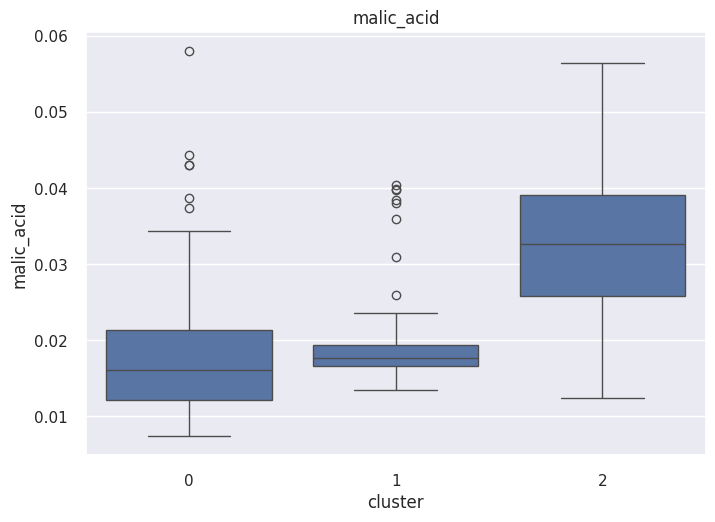

ash - Represents the non-volatile residue in wine.
- Typical range is 1.5-3.0 g/L; doesn't directly influence taste.

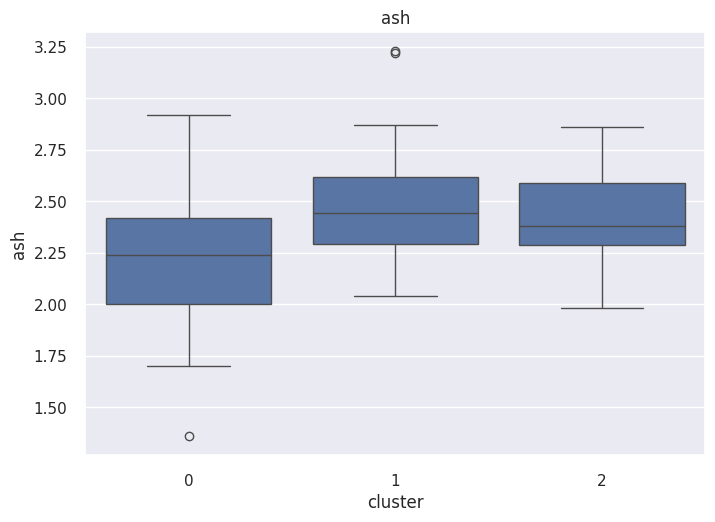

alcalinity_of_ash - Measures the alcalinity of the ash content.
- Low (<15): Higher acidity, crisp.
- High (>25): Lower acidity, might taste flat.

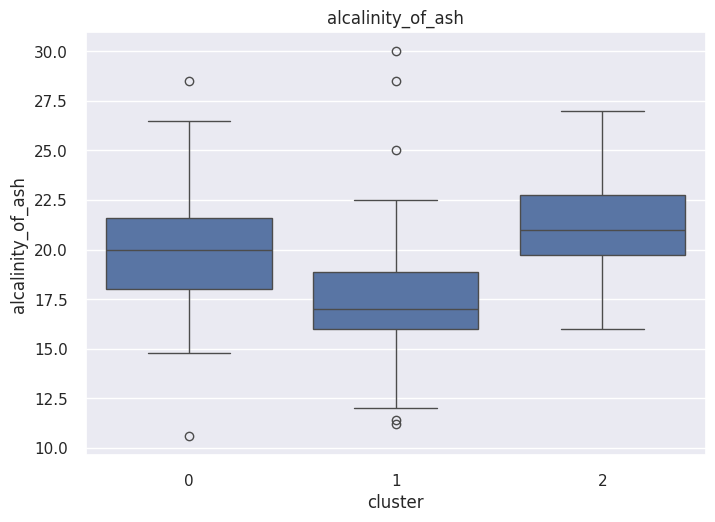

magnesium - Indicates the magnesium level in wine.
- Standard range 70-120 ppm; doesn't directly affect taste.

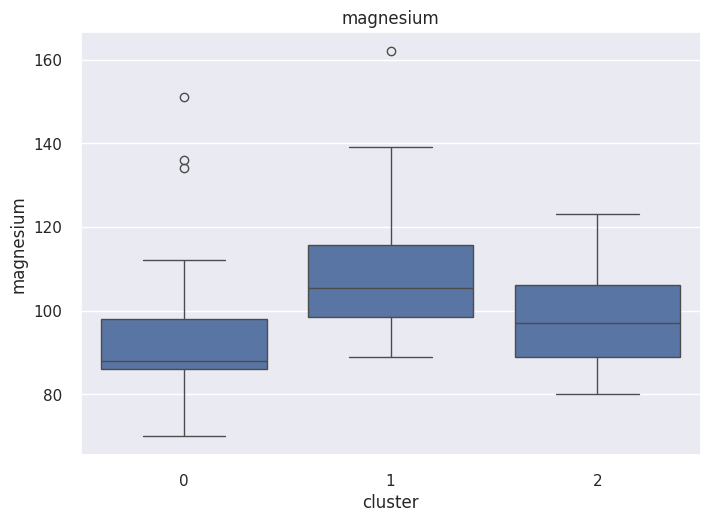

total_phenols - Represents the total phenolic content.
- Low (<500 mg/L): Less complex, might age poorly.
- High (>1500 mg/L): More complexity, better aging potential.

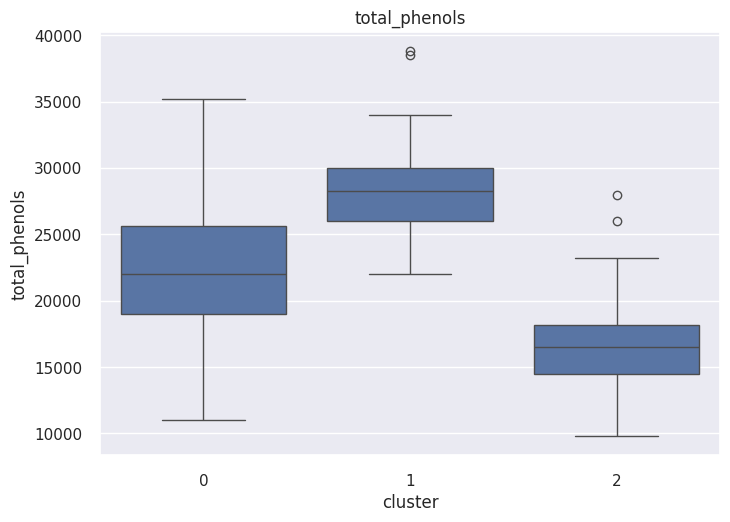

flavanoids - Indicates the flavanoid phenolic content.
- Low (<100 mg/L): Less complexity, poorer aging.
- High (>500 mg/L): More complexity, better aging potential.

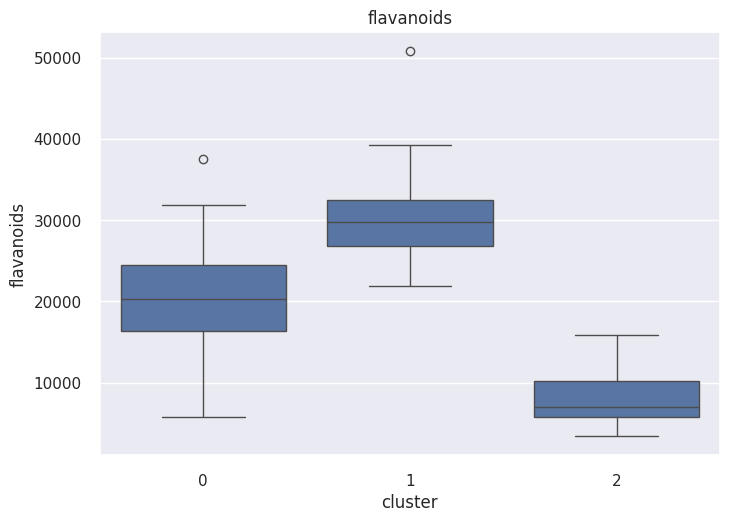

nonflavanoid_phenols - Measures the non-flavanoid phenolic content.
- Low (<20 mg/L): Better aging potential.
- High (>50 mg/L): Could affect mouthfeel negatively.

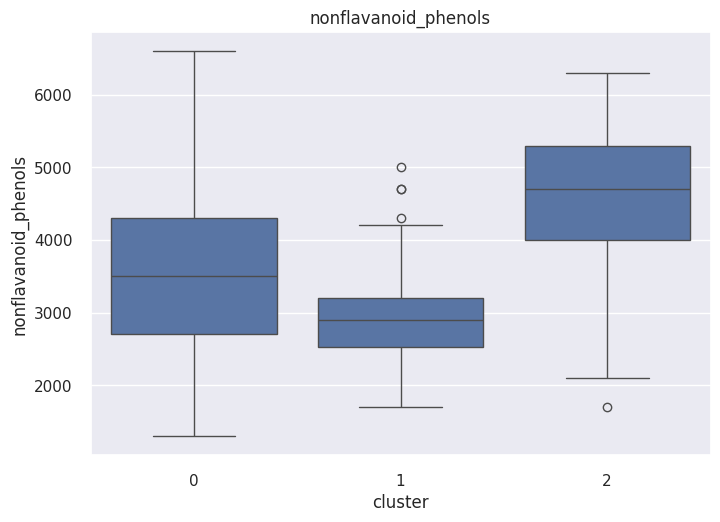

proanthocyanins - Indicates the proanthocyanin content.
- Low (<200 mg/L): Lighter color.
- High (>500 mg/L): Darker color, more aging potential.

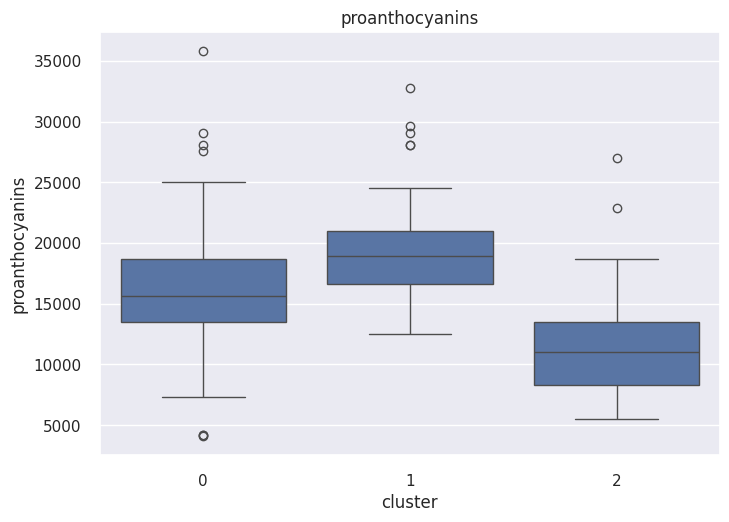

color_intensity - Measures the color intensity of the wine.
- Low: Lighter color, often lighter flavor.
- High: Darker color, often bolder flavor.

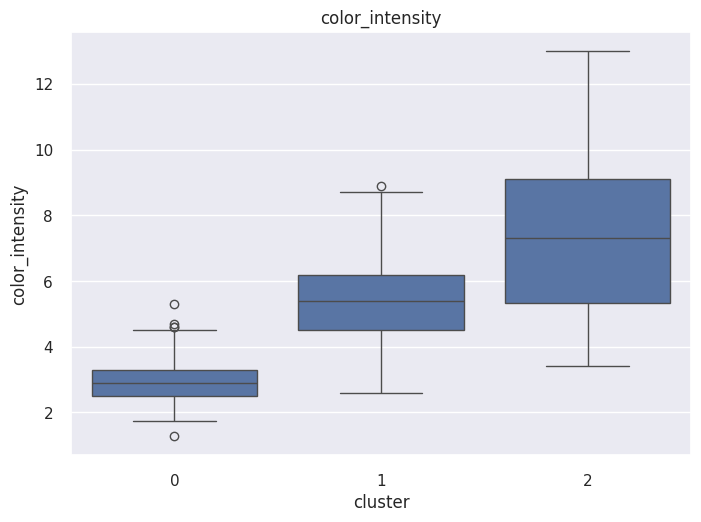

hue - Indicates the hue, or color tint, of the wine.
- Lower : Younger or less quality in red wines.
- High : Older, potentially higher quality especially in red wines.

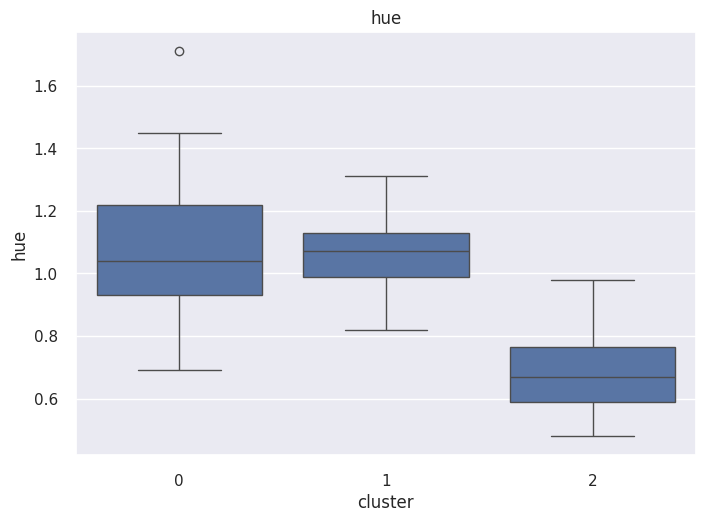

od280/od315_of_diluted_wines - Measures the antioxidant content using absorbance ratio.
- Low (<1.5): Lower antioxidant content.
- High (>3.0): Higher antioxidant content, might indicate better aging potential.

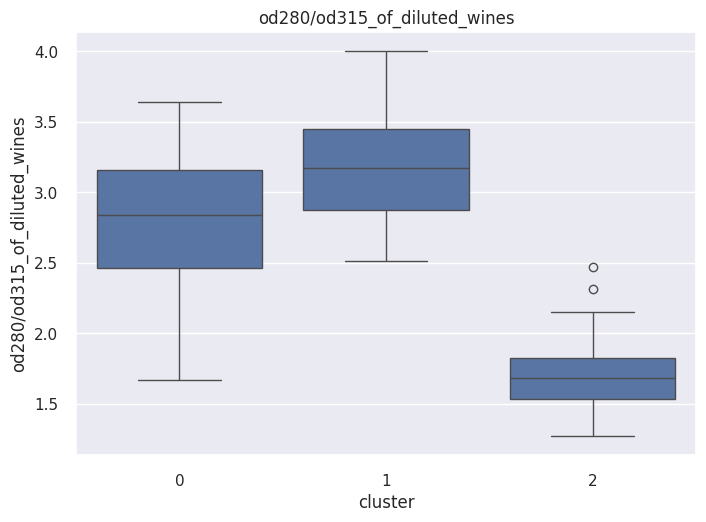

proline - Indicates the proline level, an amino acid.
- Low (<500 mg/L): Could indicate less ripe grapes or lower quality.
- High (>1000 mg/L): Could indicate riper grapes or higher quality.

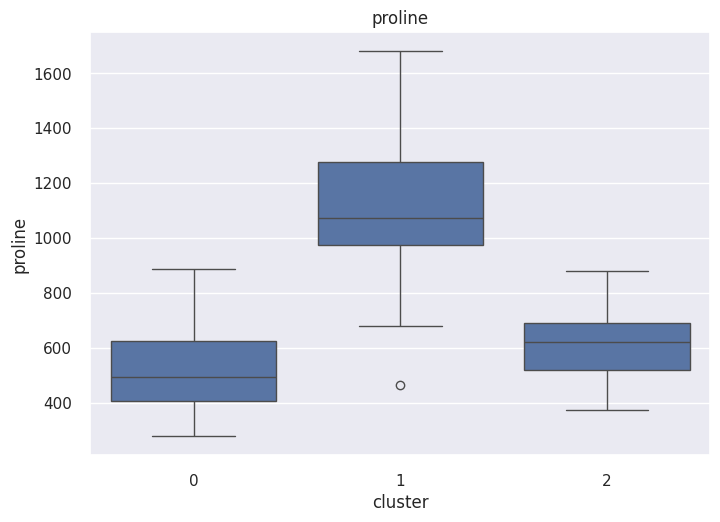

In [ ]:
# Plot numerical features
wine_df['cluster'] = cluster_label_dict[3]
wine_df['malic_acid'] = wine_df['malic_acid']/10
wine_df['total_phenols'] = wine_df['total_phenols']*100
wine_df['flavanoids'] = wine_df['flavanoids']*100
wine_df['nonflavanoid_phenols'] = wine_df['nonflavanoid_phenols']*100
wine_df['proanthocyanins'] = wine_df['proanthocyanins']*100

for col in wine_df:

    if col not in ['label', 'cluster']:

        display(Markdown(col + ' - ' + WINE_FEATURES[col]))


        plt.figure()
        sns.boxplot(wine_df, x='cluster', y=col)
        plt.title(col)
        plt.show();